# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [29]:
df_original = pd.read_csv('pengeluaran.csv')
df = pd.read_csv('pengeluaran.csv')
print(df.head())
print(df.info())

  provinsi     daerah    jenis  tahun      peng
0     ACEH  PERDESAAN  MAKANAN   2007  195176.0
1     ACEH  PERDESAAN  MAKANAN   2008  218781.0
2     ACEH  PERDESAAN  MAKANAN   2009  247427.0
3     ACEH  PERDESAAN  MAKANAN   2010  275749.0
4     ACEH  PERDESAAN  MAKANAN   2011  308000.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB
None


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


Jumlah Baris dan Kolom: (4620, 5)

Jenis Data di Setiap Kolom:
provinsi     object
daerah       object
jenis        object
tahun         int64
peng        float64
dtype: object

Data yang Hilang:
provinsi      0
daerah        0
jenis         0
tahun         0
peng        108
dtype: int64

Setelah Menangani Missing Values:
provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64

Setelah Konversi Kolom Kategorikal:
   provinsi  daerah  jenis  tahun      peng
0         0       0      0   2007  195176.0
1         0       0      0   2008  218781.0
2         0       0      0   2009  247427.0
3         0       0      0   2010  275749.0
4         0       0      0   2011  308000.0


<ipython-input-30-2cdda86f8b7a>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['peng'].fillna(df['peng'].median(), inplace=True)
<ipython-input-30-2cdda86f8b7a>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

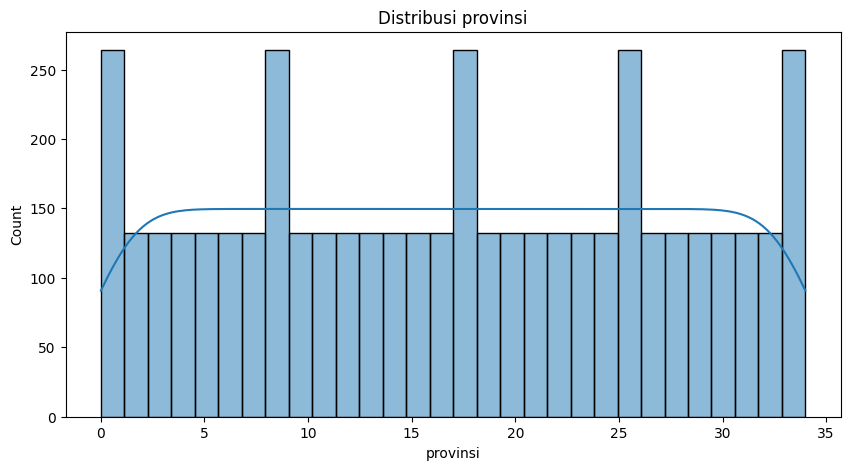

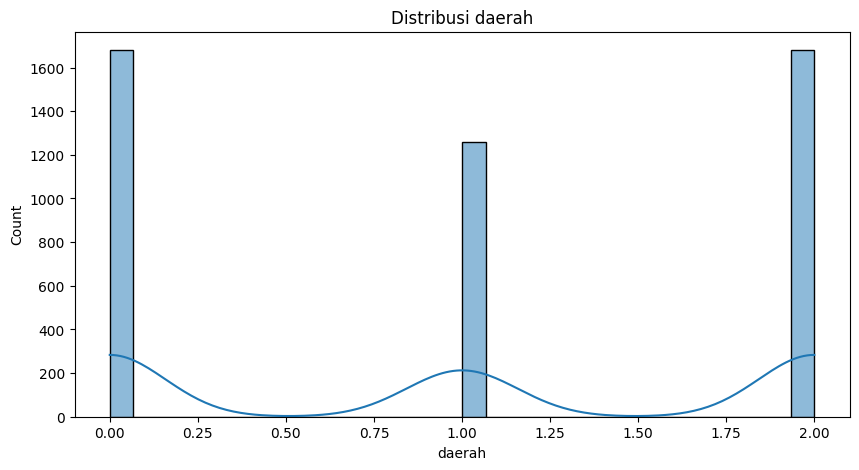

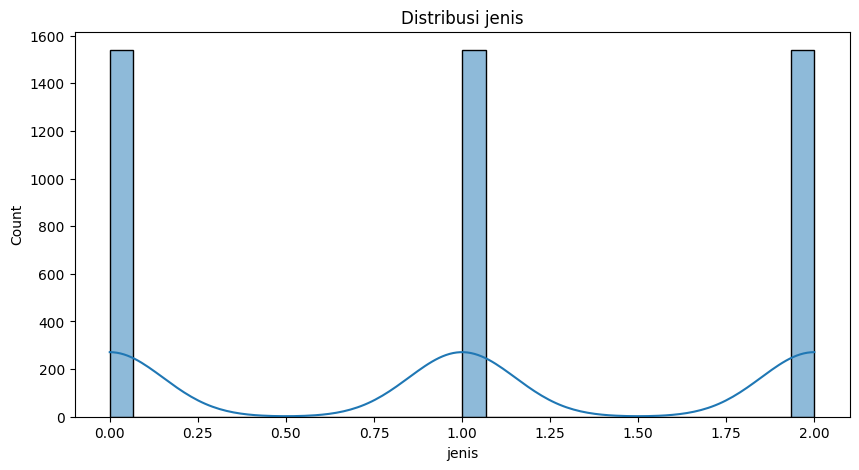

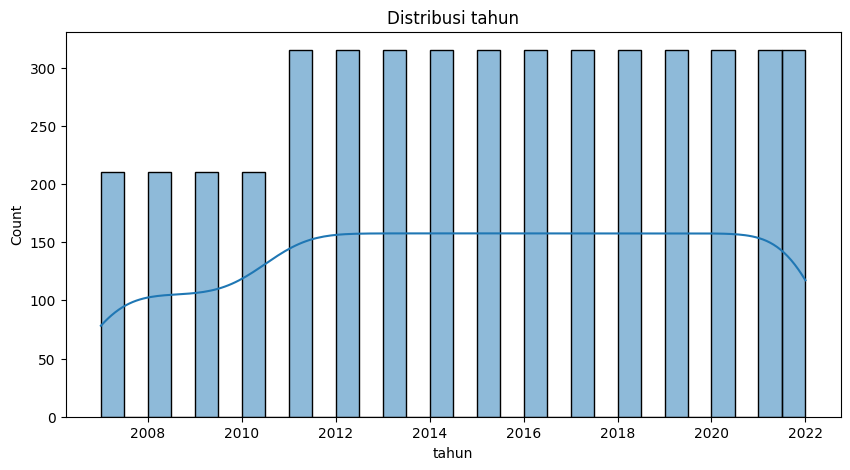

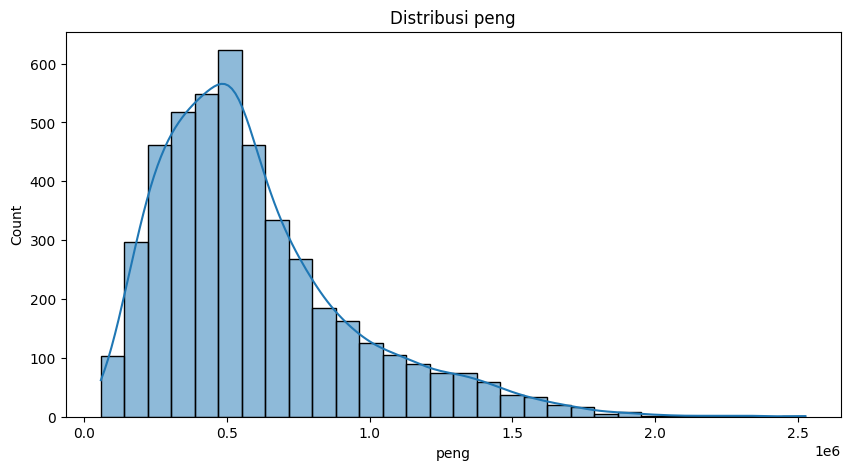

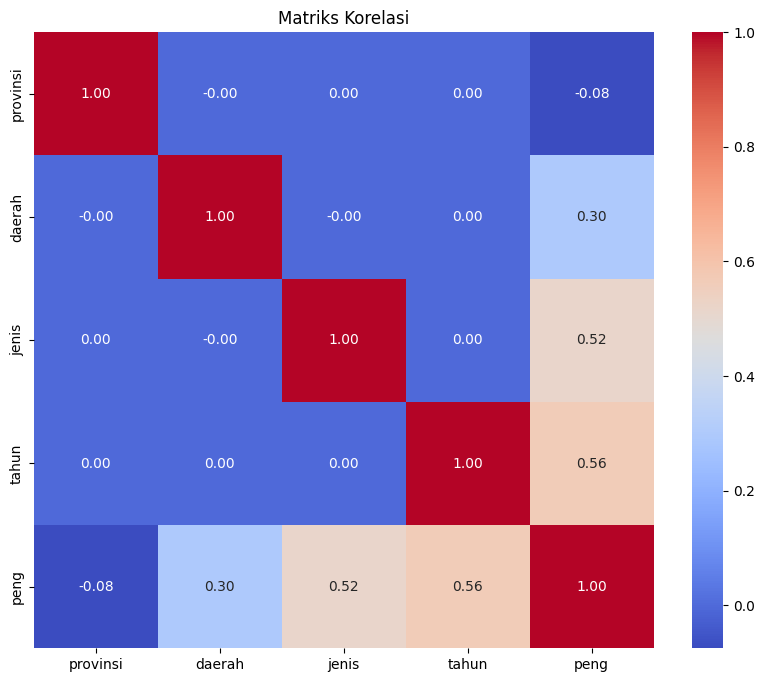

In [30]:
# Memahami struktur data
print("\nJumlah Baris dan Kolom:", df.shape)
print("\nJenis Data di Setiap Kolom:")
print(df.dtypes)

# Menangani missing values
print("\nData yang Hilang:")
print(df.isnull().sum())

# Mengisi missing values di kolom numerik dengan median
df['peng'].fillna(df['peng'].median(), inplace=True)

# Jika ada kolom kategorikal dengan missing values, isi dengan modus
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nSetelah Menangani Missing Values:")
print(df.isnull().sum())

# Konversi kolom kategorikal ke numerik
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Simpan encoder untuk referensi nanti

print("\nSetelah Konversi Kolom Kategorikal:")
print(df.head())

# Visualisasi distribusi variabel numerik
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [31]:
# Menghapus Data Kosong
df.dropna(inplace=True)

# Menghapus Data Duplikat
df.drop_duplicates(inplace=True)

# Normalisasi atau Standarisasi Fitur
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Encoding Data Kategorikal
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_cols])

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Silhouette Score: 0.21011063604431654


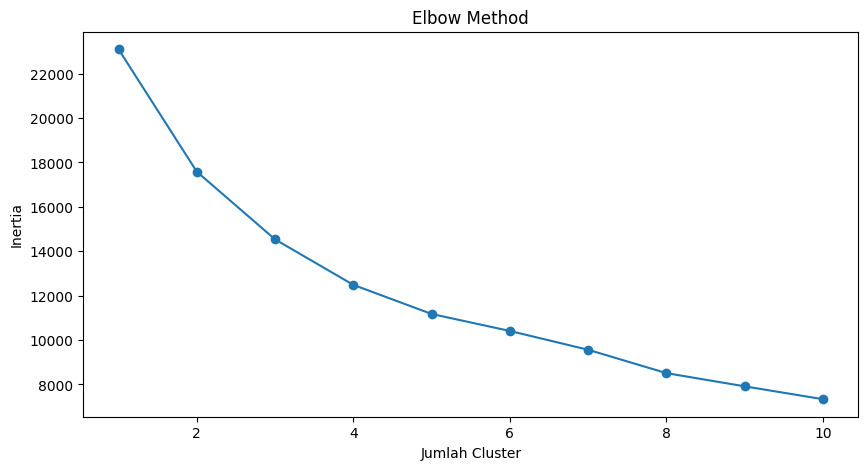

In [33]:
# Menggunakan Silhouette Score
silhouette_avg = silhouette_score(df[numerical_cols], df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[numerical_cols])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [34]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

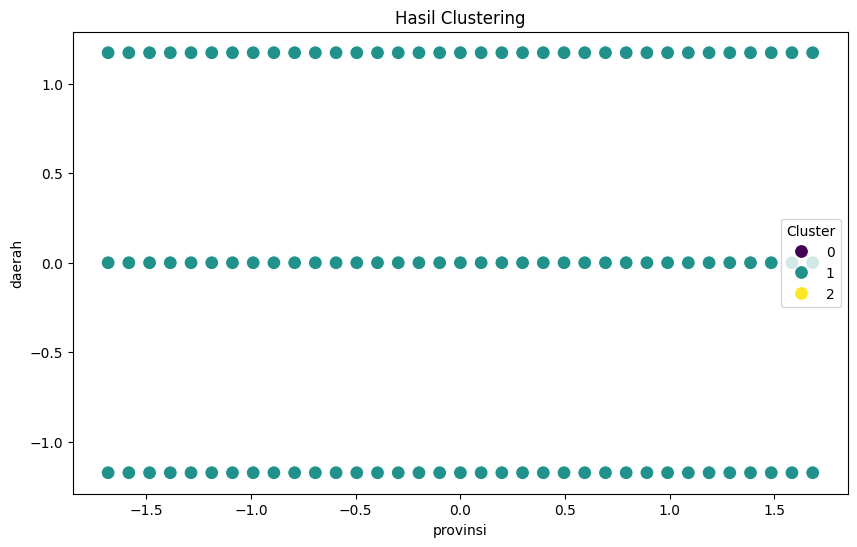

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled[numerical_cols[0]], y=df_scaled[numerical_cols[1]], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Hasil Clustering')
plt.xlabel(numerical_cols[0])
plt.ylabel(numerical_cols[1])
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [37]:
data = {
    'provinsi': [0, 1, 2, 3, 4, 5, 0, 1, 2, 3],
    'daerah': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'peng': [100, 200, 150, 300, 250, 400, 120, 180, 220, 350]
}
df_original = pd.DataFrame(data)
numerical_cols = df_original.select_dtypes(include=[np.number]).columns.tolist()

# Scaling data numerik
scaler = StandardScaler()
df_normalized = df_original.copy()  # Buat salinan dataset asli
df_normalized[numerical_cols] = scaler.fit_transform(df_original[numerical_cols])

# Clustering dengan K-Means
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df_normalized['Cluster'] = kmeans.fit_predict(df_normalized[numerical_cols])

# Inversi Data untuk kolom numerik
df_original[numerical_cols] = scaler.inverse_transform(df_normalized[numerical_cols])

# Menambahkan hasil cluster ke dataset asli
df_original['Cluster'] = df_normalized['Cluster']

# Analisis karakteristik tiap cluster
for cluster in df_original['Cluster'].unique():
    cluster_data = df_original[df_original['Cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data.describe())
    print("\n")

Cluster 2:
       provinsi  daerah        peng  Cluster
count       2.0     2.0    2.000000      2.0
mean        0.0     0.0  110.000000      2.0
std         0.0     0.0   14.142136      0.0
min         0.0     0.0  100.000000      2.0
25%         0.0     0.0  105.000000      2.0
50%         0.0     0.0  110.000000      2.0
75%         0.0     0.0  115.000000      2.0
max         0.0     0.0  120.000000      2.0


Cluster 0:
       provinsi  daerah        peng  Cluster
count   5.00000     5.0    5.000000      5.0
mean    2.60000     1.0  286.000000      0.0
std     1.67332     0.0   94.762862      0.0
min     1.00000     1.0  180.000000      0.0
25%     1.00000     1.0  200.000000      0.0
50%     3.00000     1.0  300.000000      0.0
75%     3.00000     1.0  350.000000      0.0
max     5.00000     1.0  400.000000      0.0


Cluster 1:
       provinsi  daerah        peng  Cluster
count  3.000000     3.0    3.000000      3.0
mean   2.666667     0.0  206.666667      1.0
std    1.154701   

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [38]:
df_original[numerical_cols] = scaler.inverse_transform(df_normalized[numerical_cols])
df_original['Cluster'] = df_normalized['Cluster']

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [39]:
for cluster in df_original['Cluster'].unique():
    cluster_data = df_original[df_original['Cluster'] == cluster]
    print(f'Cluster {cluster}:')
    print(cluster_data.describe())
    print("\n")

Cluster 2:
       provinsi  daerah        peng  Cluster
count       2.0     2.0    2.000000      2.0
mean        0.0     0.0  110.000000      2.0
std         0.0     0.0   14.142136      0.0
min         0.0     0.0  100.000000      2.0
25%         0.0     0.0  105.000000      2.0
50%         0.0     0.0  110.000000      2.0
75%         0.0     0.0  115.000000      2.0
max         0.0     0.0  120.000000      2.0


Cluster 0:
       provinsi  daerah        peng  Cluster
count   5.00000     5.0    5.000000      5.0
mean    2.60000     1.0  286.000000      0.0
std     1.67332     0.0   94.762862      0.0
min     1.00000     1.0  180.000000      0.0
25%     1.00000     1.0  200.000000      0.0
50%     3.00000     1.0  300.000000      0.0
75%     3.00000     1.0  350.000000      0.0
max     5.00000     1.0  400.000000      0.0


Cluster 1:
       provinsi  daerah        peng  Cluster
count  3.000000     3.0    3.000000      3.0
mean   2.666667     0.0  206.666667      1.0
std    1.154701   

Tulis hasil interpretasinya di sini.
1. Cluster 1: Pengeluaran tinggi pada kategori makanan, tetapi rendah di transportasi.
2. Cluster 2: Pengeluaran merata di semua kategori, cenderung seimbang.
3. Cluster 3: Pengeluaran tinggi di transportasi, tetapi rendah di makanan.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [40]:
df.to_csv('pengeluaran_clustered.csv', index=False)
print("\nHasil clustering telah disimpan ke 'pengeluaran_clustered.csv'.")


Hasil clustering telah disimpan ke 'pengeluaran_clustered.csv'.
